In [1]:
# from google.colab import files
# files.upload()  # Upload kaggle.json

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json

# !kaggle competitions download -c playground-series-s5e8

In [2]:
# !unzip /content/playground-series-s5e8.zip -d /content/playground-series-s5e8

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [4]:
# test_df = pd.read_csv('data/test.csv')
# test_df.head()

In [5]:
# sub_df = pd.read_csv('data/sample_submission.csv')
# sub_df.head()

In [6]:
df = pd.read_csv('data/train.csv')
df.head(10)

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1
5,5,24,admin.,single,secondary,no,1882,yes,no,cellular,20,apr,1010,3,-1,0,unknown,0
6,6,39,blue-collar,married,secondary,no,0,no,no,telephone,21,nov,90,1,-1,0,unknown,0
7,7,50,admin.,single,secondary,no,1595,no,no,telephone,31,jul,49,25,-1,0,unknown,0
8,8,46,blue-collar,married,primary,no,1463,no,no,cellular,4,aug,50,1,-1,0,unknown,0
9,9,39,management,divorced,tertiary,no,25,yes,no,cellular,8,may,119,1,-1,0,unknown,0


In [7]:
df.shape

(750000, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 18 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         750000 non-null  int64 
 1   age        750000 non-null  int64 
 2   job        750000 non-null  object
 3   marital    750000 non-null  object
 4   education  750000 non-null  object
 5   default    750000 non-null  object
 6   balance    750000 non-null  int64 
 7   housing    750000 non-null  object
 8   loan       750000 non-null  object
 9   contact    750000 non-null  object
 10  day        750000 non-null  int64 
 11  month      750000 non-null  object
 12  duration   750000 non-null  int64 
 13  campaign   750000 non-null  int64 
 14  pdays      750000 non-null  int64 
 15  previous   750000 non-null  int64 
 16  poutcome   750000 non-null  object
 17  y          750000 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 103.0+ MB


In [9]:
df.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,40.926395,1204.067397,16.117209,256.229144,2.577008,22.412733,0.298545,0.120651
std,216506.495284,10.098829,2836.096759,8.250832,272.555662,2.718514,77.319998,1.335926,0.325721
min,0.000000,18.000000,-8019.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,187499.750000,33.000000,0.000000,9.000000,91.000000,1.000000,-1.000000,0.000000,0.000000
50%,374999.500000,39.000000,634.000000,17.000000,133.000000,2.000000,-1.000000,0.000000,0.000000
75%,562499.250000,48.000000,1390.000000,21.000000,361.000000,3.000000,-1.000000,0.000000,0.000000
max,749999.000000,95.000000,99717.000000,31.000000,4918.000000,63.000000,871.000000,200.000000,1.000000


In [10]:
for col in df.select_dtypes('object').columns:
  print(f'{col}: {df[col].unique()}')

job: ['technician' 'blue-collar' 'student' 'admin.' 'management' 'entrepreneur'
 'self-employed' 'unknown' 'services' 'retired' 'housemaid' 'unemployed']
marital: ['married' 'single' 'divorced']
education: ['secondary' 'primary' 'tertiary' 'unknown']
default: ['no' 'yes']
housing: ['no' 'yes']
loan: ['no' 'yes']
contact: ['cellular' 'unknown' 'telephone']
month: ['aug' 'jun' 'may' 'feb' 'apr' 'nov' 'jul' 'jan' 'oct' 'mar' 'sep' 'dec']
poutcome: ['unknown' 'other' 'failure' 'success']


In [11]:
df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [12]:
df1 = df.drop(['id'], axis=1)

In [13]:
df1.shape

(750000, 17)

In [14]:
bank_df = pd.read_csv('data/bank-full.csv',sep=';')
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
bank_df.shape

(45211, 17)

In [16]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
bank_df['y'] = bank_df['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [18]:
bank_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [19]:
df1 = pd.concat([df1, bank_df], ignore_index=True)

In [20]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,42,technician,married,secondary,no,7,no,no,cellular,25,aug,117,3,-1,0,unknown,0
1,38,blue-collar,married,secondary,no,514,no,no,unknown,18,jun,185,1,-1,0,unknown,0
2,36,blue-collar,married,secondary,no,602,yes,no,unknown,14,may,111,2,-1,0,unknown,0
3,27,student,single,secondary,no,34,yes,no,unknown,28,may,10,2,-1,0,unknown,0
4,26,technician,married,secondary,no,889,yes,no,cellular,3,feb,902,1,-1,0,unknown,1


In [21]:
df1.shape

(795211, 17)

## ML pipeline notes to apply to test

1. was_previously_contacted = (pdays != -1)
2.

In [22]:
df1['was_previously_contacted'] = df1['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [23]:
all_cols = set(df1.columns)-set('y')
all_cols.__len__()

17

In [24]:
def plot_feature_vs_target(df, feature_col, target_col='y'):
    plt.figure(figsize=(15, 6))

    if pd.api.types.is_numeric_dtype(df[feature_col]):
        sns.histplot(data=df, x=feature_col, hue=target_col, kde=True)
    else:
        sns.countplot(data=df, x=feature_col, hue=target_col)
        plt.xticks(rotation=45)

    plt.title(f"{feature_col} vs {target_col}")
    plt.tight_layout()
    plt.show()

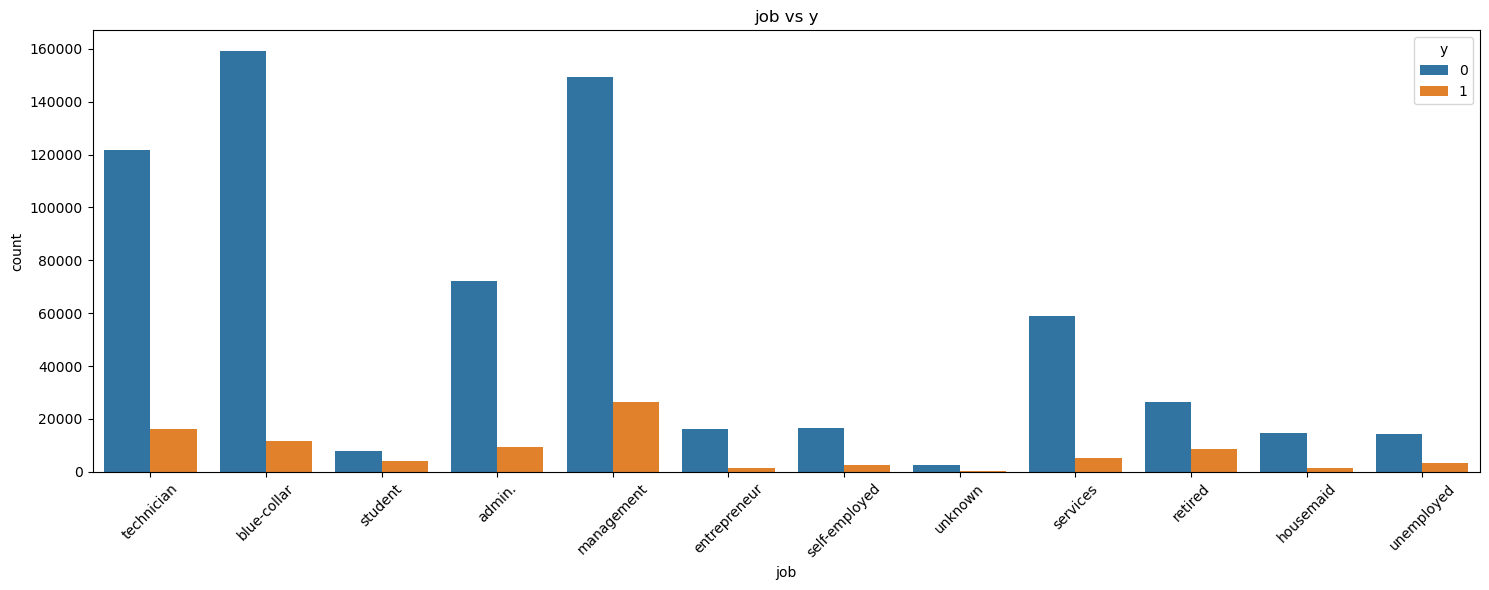

In [25]:
plot_feature_vs_target(df, 'job')

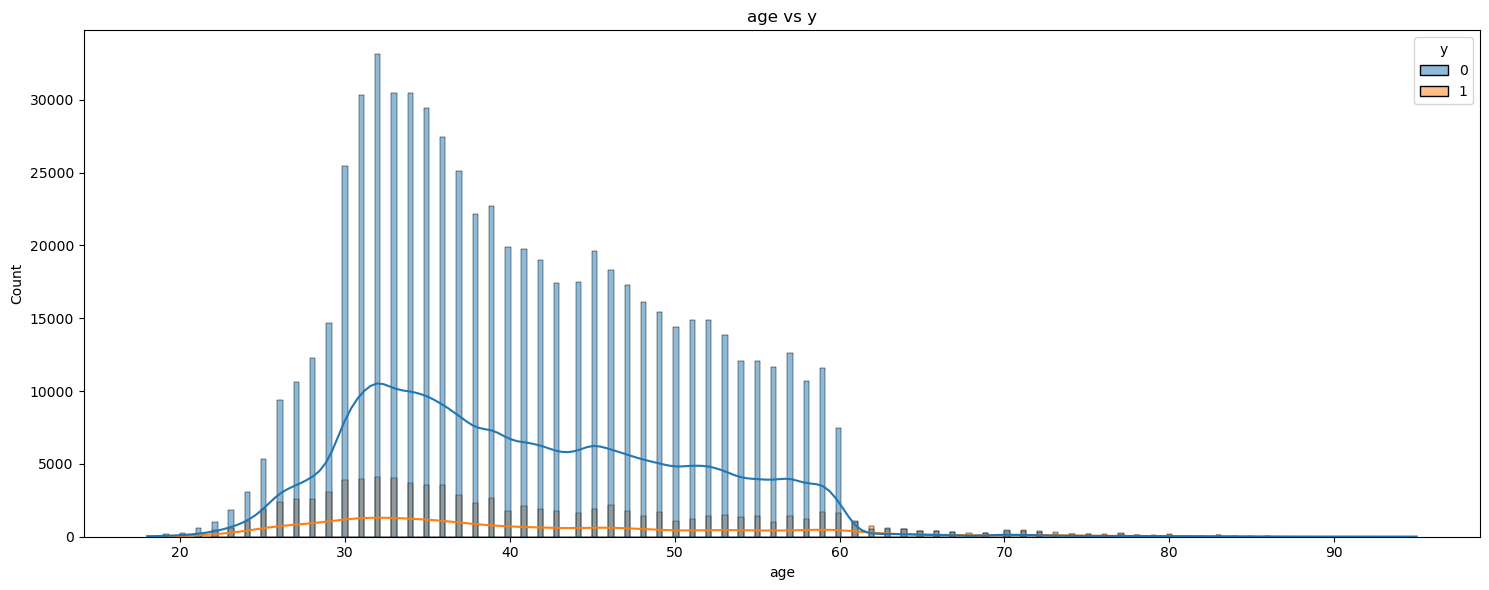

In [26]:
plot_feature_vs_target(df, 'age')

In [27]:
all_cols

{'age',
 'balance',
 'campaign',
 'contact',
 'day',
 'default',
 'duration',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'pdays',
 'poutcome',
 'previous',
 'was_previously_contacted'}

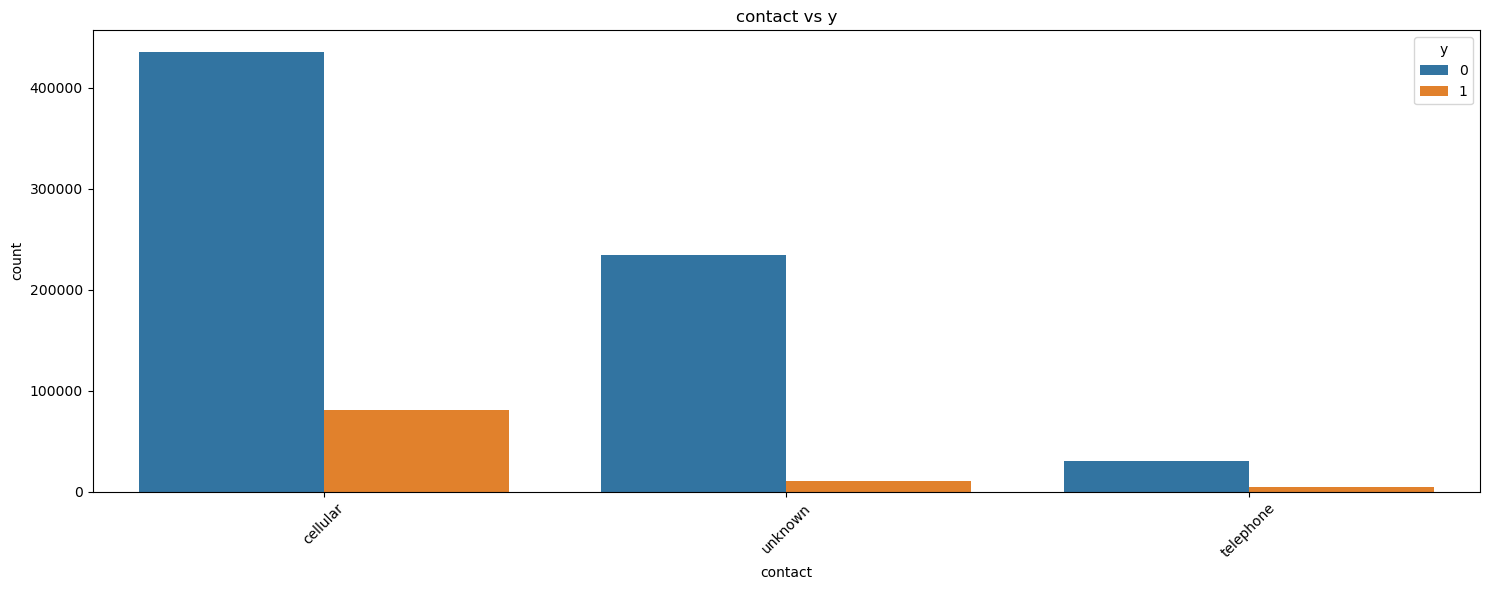

In [28]:
plot_feature_vs_target(df1, 'contact')

In [29]:
for col in df1.columns:
    print(col,' - ', df1[col].dtype)

age  -  int64
job  -  object
marital  -  object
education  -  object
default  -  object
balance  -  int64
housing  -  object
loan  -  object
contact  -  object
day  -  int64
month  -  object
duration  -  int64
campaign  -  int64
pdays  -  int64
previous  -  int64
poutcome  -  object
y  -  int64
was_previously_contacted  -  int8


In [30]:
# job_dummy = pd.get_dummies(df1['job'])
# job_dummy.head()

In [31]:
# for col in set(job_dummy.columns[:-1]):
#     df1[col] = job_dummy[col]
#     print(col, ' - completed', df1.shape)

In [32]:
# def ohe(data:pd.DataFrame, col:str) -> pd.DataFrame:
#     data = data.copy()
#     col_dummy = pd.get_dummies(data[col])
#     print('data shape before - ',data.shape,' categorical cols in ', col, ' - ', col_dummy.shape)
#     for col in col_dummy.columns[:-1]:
#         data[col] = col_dummy[col]
#     print('dataframe size after - ', data.shape)
#     return data

In [33]:
# df2 = ohe(df1, 'marital')

In [34]:
df1.select_dtypes(include='object').columns.tolist()

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [35]:
df2 = df1.copy()

In [36]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

target_col = 'y'
cat_cols = df2.select_dtypes(include=['object', 'category']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), cat_cols)
    ],
    remainder='passthrough'
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
])

X = df2.drop(columns=[target_col])
y = df2[target_col]

X_transformed = model.fit_transform(X)

ohe = preprocessor.named_transformers_['cat']
cat_feature_names = ohe.get_feature_names_out(cat_cols)

non_cat_cols = [col for col in X.columns if col not in cat_cols]

all_feature_names = list(cat_feature_names) + non_cat_cols

X_transformed_df = pd.DataFrame(X_transformed, columns=all_feature_names, index=X.index)

In [37]:
# df3.shape

In [38]:
preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=cat_cols)

array(['job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'default_yes', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'], dtype=object)

In [39]:
X = X_transformed_df
y = df2['y']

In [40]:
X.shape

(795211, 43)

In [41]:
# for col in df2.select_dtypes(include='object').columns.tolist():
#     df2 = ohe(df2, col)

In [42]:
# df3 = df2.drop(df2.select_dtypes(include='object').columns.tolist(), axis=1)

In [43]:
# df3.shape

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor,XGBClassifier

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
xgb_params = {
    'learning_rate': 0.1951339614286697,
    'max_depth': 13,
    'min_child_weight': 14,
    'gamma': 4.586254878038162,
    'subsample': 0.8829082972307842,
    'colsample_bytree': 0.6106352277501341,
    'lambda': 9.976935506747019,
    'alpha': 0.0018063487584367348,
    'scale_pos_weight': 3.6963430205760193,
    'objective': 'binary:logistic',
    'use_label_encoder': False,
    'n_jobs': -1,
    'random_state': 42,
#     'tree_method': 'gpu_hist'
}

In [64]:
xgb_model = XGBClassifier(**xgb_params)
xgb_model.fit(X_train, y_train)
print("Test R² Score:", xgb_model.score(X_test, y_test))

/home/aum/anaconda3/envs/ml/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [10:29:55] WARNING: /croot/xgboost-split_1724073744422/work/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Test R² Score: 0.9167835113774262


In [65]:
from sklearn.metrics import roc_auc_score

In [66]:
roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])

0.9659880709290171

In [49]:
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier
# from sklearn.metrics import roc_auc_score


In [50]:
# print("LR:", roc_auc_score(y_test, LogisticRegression().fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("RF:", roc_auc_score(y_test, RandomForestClassifier().fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("SVC:", roc_auc_score(y_test, SVC(probability=True).fit(X_train, y_train).predict_proba(X_test)[:, 1]))
# print("XGB:", roc_auc_score(y_test, XGBClassifier(use_label_encoder=False, eval_metric='logloss').fit(X_train, y_train).predict_proba(X_test)[:, 1]))


In [51]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,750000,32,blue-collar,married,secondary,no,1397,yes,no,unknown,21,may,224,1,-1,0,unknown
1,750001,44,management,married,tertiary,no,23,yes,no,cellular,3,apr,586,2,-1,0,unknown
2,750002,36,self-employed,married,primary,no,46,yes,yes,cellular,13,may,111,2,-1,0,unknown
3,750003,58,blue-collar,married,secondary,no,-1380,yes,yes,unknown,29,may,125,1,-1,0,unknown
4,750004,28,technician,single,secondary,no,1950,yes,no,cellular,22,jul,181,1,-1,0,unknown


In [52]:
test_df['was_previously_contacted'] = test_df['pdays'].apply(lambda x:1 if x != -1 else 0).astype("int8")

In [53]:
test_df2 = test_df.drop(columns=['id'])

In [54]:
test_df3 = model.transform(test_df2)

In [55]:
final_df = pd.DataFrame(test_df3, columns=all_feature_names, index=test_df2.index)

In [56]:
final_df.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,...,poutcome_success,poutcome_unknown,age,balance,day,duration,campaign,pdays,previous,was_previously_contacted
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,32.0,1397.0,21.0,224.0,1.0,-1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,44.0,23.0,3.0,586.0,2.0,-1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,36.0,46.0,13.0,111.0,2.0,-1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,58.0,-1380.0,29.0,125.0,1.0,-1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,28.0,1950.0,22.0,181.0,1.0,-1.0,0.0,0.0


In [57]:
xgb_model.predict(final_df)

array([0, 0, 0, ..., 1, 0, 0])

In [67]:
submission_df = pd.DataFrame({
    'id':test_df['id'],
    'y':xgb_model.predict(final_df)
})

In [68]:
submission_df.tail()

,id,y
249995,999995,0
249996,999996,0
249997,999997,1
249998,999998,0
249999,999999,0


In [69]:
submission_df.to_csv('submission.csv',index=False)

## At end download the orignal dataset and then test the model on that